# Introduction



As a group, we are trying to accomplish the task of determining what the best neighborhood in Pittsburgh is based on datasets we chose from the WPRDC. This task was a challenge as it required figuring out what was truly important to the communities and how they could all be compared easily. We found that the best way to do this was based on neighborhood wealth, with specific subsets to determine what neighborhood is the best based on each subset and overall.

# The Metric: Wealth

Our metric we decided to base our best neighborhoods on was wealth. In order to accurately track this, we based it on a few factors. Those mainly were housing, with a dataset based on neighborhoods with SNAP data, income, with a dataset based on aggregate household income within the past 12 months, businesses, with a dataset based on assets per street in Allegheny County, and education. Julian handled housing, Tanishq handled income, Elias handled business, and Yunus handled education.

# The Best Neighborhood

* Aggregate Household Income Within the Past 12 Months (Tanishq)

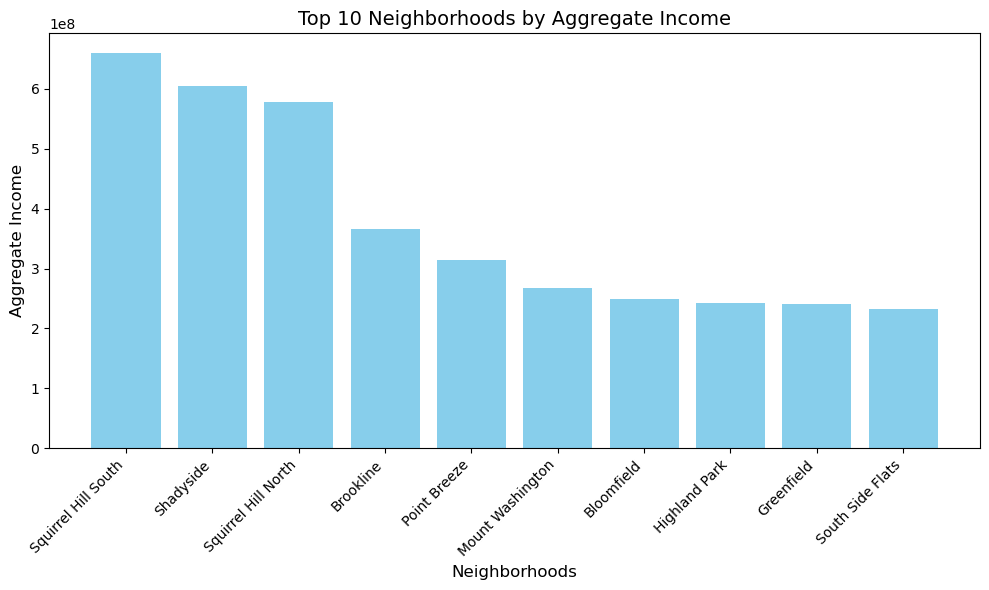

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
path = "https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/34842307-0da6-458a-9df3-a09ab3e3a489/download/aggregate-household-income-in-the-past-12-months-in-2015-inflation-adjusted-dollars.csv"
data = pd.read_csv(path)
neighborhoods = data["Neighborhood"]
#necessary imports, get the dataset, and get the neighborhoods column

income = pd.to_numeric(data[
    'Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)'
].str.replace(',', '').str.strip(), errors='coerce')
#the income is a little messy, so we clean it up through this method

df = pd.DataFrame({'Neighborhood': neighborhoods, 'Income': income})
top_10 = df.sort_values(by='Income', ascending=False).head(10)
#create a dataframe and sort the values from greatest to least
#we only get the first 10, so that we don't get a messy graph, and we still get the important information

plt.figure(figsize=(10, 6))
plt.bar(top_10['Neighborhood'], top_10['Income'], color='skyblue')
plt.xlabel("Neighborhoods", fontsize=12)
plt.ylabel("Aggregate Income", fontsize=12)
plt.title("Top 10 Neighborhoods by Aggregate Income", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#plot

In [4]:
#list of the top10 neighborhoods by income
print(top_10[['Neighborhood', 'Income']])

           Neighborhood       Income
77  Squirrel Hill South  659886300.0
68            Shadyside  605635700.0
76  Squirrel Hill North  577467500.0
13            Brookline  366945900.0
63         Point Breeze  314958500.0
53     Mount Washington  267100700.0
9            Bloomfield  249898900.0
39        Highland Park  242405400.0
36           Greenfield  241377900.0
72     South Side Flats  233098400.0


In [5]:
#lets also get the last10
last_10 = df.sort_values(by='Income', ascending=True).head(10)
print(last_10[['Neighborhood', 'Income']])

            Neighborhood      Income
4      Arlington Heights   2389600.0
87              West End   3615800.0
78             St. Clair   3867600.0
35            Glen Hazel   4773300.0
30                Esplen   5433900.0
37                  Hays   6432200.0
67             Ridgemont   7893900.0
58     Northview Heights   8755000.0
6      Bedford Dwellings  10529100.0
14  California-Kirkbride  10718900.0


* Neighborhoods with SNAP Data (Julian)

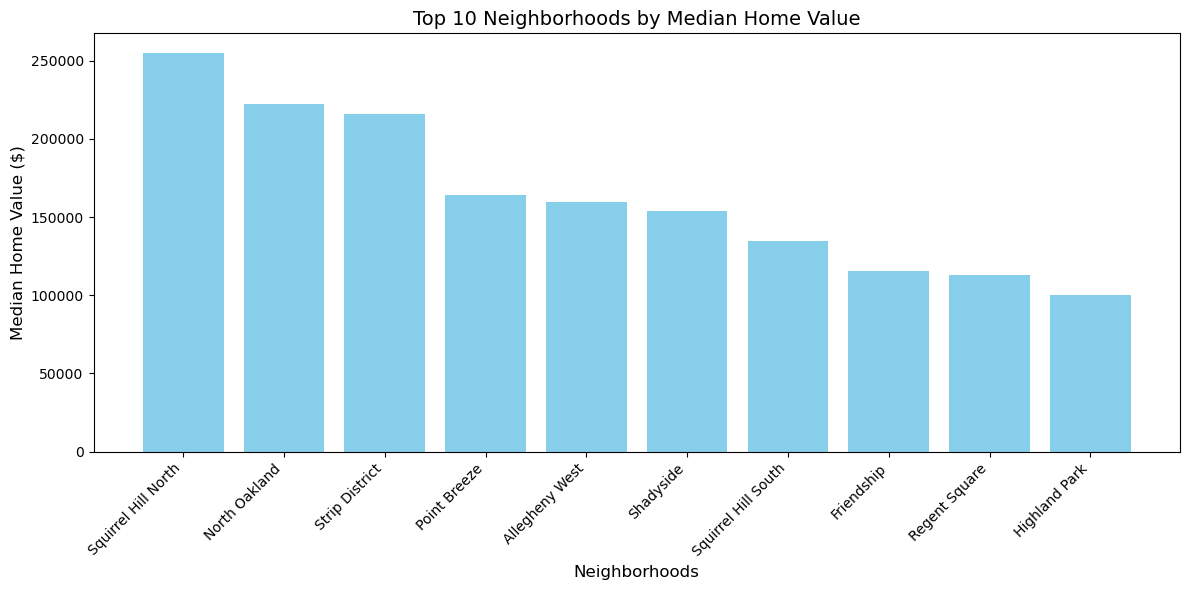

In [2]:
# Import pandas and matplotlib.pyplot and define path and data
import pandas as pd
import matplotlib.pyplot as plt
path = "https://pghgishub-pittsburghpa.opendata.arcgis.com/datasets/3ca13246362540fa8b4b567f84a1255b_0.csv?outSR=%7B%22latestWkid%22%3A6565%2C%22wkid%22%3A103142%7D"
data = pd.read_csv(path)

# Get the relevant columns from the dataset
housing_data = data[["SNAP_All_csv_Neighborhood", "SNAP_All_csv_Median_Home_Value_"]]

# Rename columns and clean them to look nice on the chart
housing_data = housing_data.rename(columns={
    "SNAP_All_csv_Neighborhood": "Neighborhood",
    "SNAP_All_csv_Median_Home_Value_": "Median_Home_Value"
})

housing_data["Median_Home_Value"] = pd.to_numeric(
    housing_data["Median_Home_Value"].str.replace(",", "").str.strip("$"),
    errors="coerce"
)

# Sort neighborhoods and select top 10
top_10_neighborhoods = housing_data.sort_values(by="Median_Home_Value", ascending=False).head(10)

# Plot top 10 neighborhoods on the graph
plt.figure(figsize=(12, 6))
plt.bar(top_10_neighborhoods["Neighborhood"], top_10_neighborhoods["Median_Home_Value"], color="skyblue")
plt.xlabel("Neighborhoods", fontsize=12)
plt.ylabel("Median Home Value ($)", fontsize=12)
plt.title("Top 10 Neighborhoods by Median Home Value", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [3]:
# Print top 10 neighborhoods as a table
print(top_10_neighborhoods)

           Neighborhood  Median_Home_Value
65  Squirrel Hill North           254667.0
1         North Oakland           222423.0
4        Strip District           215900.0
34         Point Breeze           164000.0
55       Allegheny West           159700.0
57            Shadyside           153560.0
25  Squirrel Hill South           134633.0
49           Friendship           115600.0
68        Regent Square           113000.0
37        Highland Park            99900.0


* All Allegheny County Assets for the Asset Map (Elias)

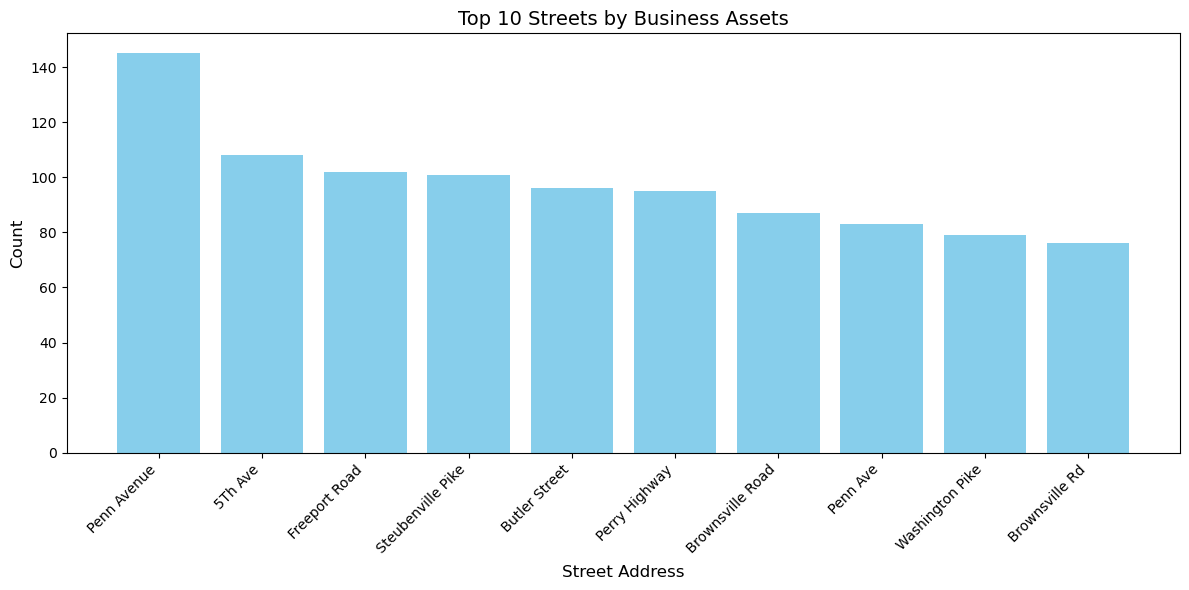

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

path = "https://data.wprdc.org/datastore/dump/5c7825d2-6814-40c7-aefe-3d0f3d6f22e7"
df = pd.read_csv(path, low_memory=False)

# Obtain useful columns
assetsData = df[["street_address", "asset_type"]]
# Create dictionaries for counts
addressCount = dict()

# Function to ignore housing number from street name
def substring_from_first_non_number(string):
  for i, char in enumerate(string):
    if not char.isdigit():
      return string[i:]
  return ""

# Iterate through the DataFrame rows
for _, row in assetsData.iterrows():
    # Count occurrences of street streets
    street = substring_from_first_non_number(str(row["street_address"]).title())
    assetType = row["asset_type"]
    if street != 'Nan' and assetType != 'community_nonprofit_orgs':
        if street in addressCount:
            addressCount[street] += 1
        else:
            addressCount[street] = 1


# Convert dictionary to DataFrame
addressDF = pd.DataFrame(list(addressCount.items()), columns=["Street Address", "Count"])

# Sort DataFrame by Count in descending order
top10Streets = addressDF.sort_values(by="Count", ascending=False).reset_index(drop=True).head(10)

# Print the resulting dictionaries
top10Streets

# Plot top 10 streets on the graph
plt.figure(figsize=(12, 6))
plt.bar(top10Streets["Street Address"], top10Streets["Count"], color="skyblue")
plt.xlabel("Street Address", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Top 10 Streets by Business Assets", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [2]:
# Print top 10 streets as a table
top10Streets

,Street Address,Count
0,Penn Avenue,145
1,5Th Ave,108
2,Freeport Road,102
3,Steubenville Pike,101
4,Butler Street,96
5,Perry Highway,95
6,Brownsville Road,87
7,Penn Ave,83
8,Washington Pike,79
9,Brownsville Rd,76


In [3]:
# Print lowest count 
#lets also get the last10
last10Streets = addressDF.sort_values(by="Count", ascending=True).reset_index(drop=True).head(10)
last10Streets[['Street Address', 'Count']]

,Street Address,Count
0,Worthington Ave,1
1,Maple Dr,1
2,-2504 Bedford Ave,1
3,Mckee Pl,1
4,-40 Hawley Ave,1
5,S Starr Ave,1
6,-265 Devilliers St,1
7,-2350 East Hills Dr,1
8,-2303 East Hills Dr,1
9,-2289 Wilner Dr,1


* (Yunus)

# Conclusion

1. Tanishq

In terms of best neighborhood by aggregate income, the winner is Squirrel Hill South! My favorite neighborhood, being from Pittsburgh, is Mt. Washington. It's a little shady in my opinion, but it also has a really nice view of the city. It also has good restaurants that have a good view of the city. I love going to the Grandview Overlook with my friends, taking good pictures, and just having a good time. It is obviously not as good as Squirrel Hill South by income, but it is still a pretty place.

2. Julian

In conclusion, according to the graph and table, the best neighborhood in Pittsburgh based on median home value is Squirrel Hill North. This does not come to a shock as Squirrel Hill is one of the more affluent neighborhoods in the city due to the amount of businesses near it and how close it is to advanced parts of the city like Oakland. Personally, my favorite neighborhood of the city would either have to go to the Strip District or North Shore. These are because of the memories I have attached to these two areas and how busy and truly lively they are. All three of these areas, as well as others within the top 10, really contribute to the city, not just from a housing standpoint, but in a sense of community as well.

3. Elias

The best street found using my dataset was Penn Avenue. Before becoming a University of Pittsburgh student, I lived in Fox Chapel, Pittsburgh. Specifically, I lived on Hillcrest Road, which is almost directly adjacent to the 3rd best street, Freeport Road. Freeport Road travels through my hometown, and I actually worked at the Chick Fil-A on Freeport Road for 2 years. This makes Freeport Road my favorite street, which also makes me disappointed in its performance. Penn Avenue mainly goes through the Strip District, which makes its argument for the number 1 seat understandable. The Strip District has a vast amount of shops and businesses, and my data argues that it hosts the most assets of Pittsburgh.

4. Yunus